<a href="https://colab.research.google.com/github/aruntakhur/PyTorch_NLP_Vision_New/blob/main/py_torch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.nn import Linear
torch.manual_seed(1)

In [2]:
model = Linear(in_features = 2, out_features= 1)
X = torch.tensor([[1.0, 3.0]])
yhat = model(X)
#list(model.parameters())
#model.state_dict()

Custom Mudules

In [3]:
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR,self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    out = self.linear(x)
    return out

In [4]:
from torch.nn import Linear
torch.manual_seed(1)

model = LR(2,1)
x = torch.tensor([[1.0, 3.0]])
yhat = model(x)

Linear Regression Training

In [5]:
from torch.utils.data import Dataset, DataLoader
class Data2D(Dataset):
  def __init__(self):
    self.x = torch.zeros(20,2)
    self.x[:,0] = torch.arange(-1,1,0.1)
    self.x[:,1] = torch.arange(-1,1,0.1)
    self.w = torch.tensor([[1.0],[1.0]])
    self.b = 1
    self.f = torch.mm(self.x,self.w)+self.b
    self.y = self.f + 0.1*torch.randn((self.x.shape[0],1))
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len


In [6]:
from torch import optim
data_set = Data2D()
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = data_set, batch_size= 2)
model = LR(input_size= 2, output_size= 1)
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [7]:
for epoch in range(200):
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [8]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.4891, 1.5115]])),
             ('linear.bias', tensor([1.0040]))])

Linear Regression Multiple Outputs

In [9]:
model_1 = LR(2,2)
x = torch.tensor([[1.0,2.0],[1.0,1.0],[1.0,3.0]])
yhat = model_1(x)
yhat

tensor([[-0.2648,  1.1441],
        [-0.6713,  0.8095],
        [ 0.1417,  1.4787]], grad_fn=<AddmmBackward0>)

Logistic Regression

In [10]:
model = nn.Sequential(nn.Linear(1,1),nn.Sigmoid())

In [11]:
class logistic_regression(nn.Module):
  def __init__(self, in_size, out=1):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(in_size, out)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [12]:
model_l = logistic_regression(2)

In [13]:
dataset = Data2D()
optimizer_l = optim.SGD(model_l.parameters(),lr = 0.1)
criterion_l = nn.BCELoss()
for epoch in range(300):
  for x,y in trainloader:
    yhat = model_l(x)
    loss = criterion_l(yhat,y)
    optimizer_l.zero_grad()
    loss.backward()
    optimizer_l.step()

In [14]:
list(model_l.parameters())

[Parameter containing:
 tensor([[23.4806, 23.6307]], requires_grad=True), Parameter containing:
 tensor([8.7320], requires_grad=True)]

In [15]:
class Softmax(nn.Module):
  def __init__(self, input_size, output_size):
    super(Softmax, self).__init__()
    self.linear = nn.Linear(input_size,output_size)
  
  def forward(self,x):
    x_o = self.linear(x)
    return x_o


In [16]:
model_s = Softmax(2,3)
z = model_s(x)

In [23]:
a,b = z.max(1)
print(a, z.max(1),z) # 1 is axis

tensor([0.7188, 0.8178], grad_fn=<MaxBackward0>) torch.return_types.max(
values=tensor([0.7188, 0.8178], grad_fn=<MaxBackward0>),
indices=tensor([0, 0])) tensor([[ 0.7188, -0.9693, -0.0425],
        [ 0.8178, -1.0024, -0.0369]], grad_fn=<AddmmBackward0>)


SoftMax Pytorch

In [26]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


In [60]:
import matplotlib.pylab as plt
def PlotParameters(model): 
    W = model.state_dict()['linear.weight']
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [30]:
train_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
validation_dataset = dsets.MNIST(root = './root', train = False, download = True, transform = transforms.ToTensor())

In [32]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 5000)

In [38]:
model_s = Softmax(28*28,10)

In [68]:
model_s = Softmax(28*28,10)
criterion_s = nn.CrossEntropyLoss()
accuracy_list = []
optimizer_s = optim.SGD(model_s.parameters(), lr = 0.1)
for epoch in range(30):
  for x,y in train_loader:
    z = model_s(x.view(-1,28*28))
    loss = criterion_s(z,y)
    optimizer_s.zero_grad()
    loss.backward()
    optimizer_s.step()
  correct = 0
  for x_test,y_test in validation_loader:
    z = model_s(x_test.view(-1,28*28))
    _,yhat = torch.max(z.data,1)
    correct = correct + (yhat == y_test).sum().item()
  accuracy = correct/len(validation_dataset)
  accuracy_list.append(accuracy)



In [66]:
accuracy_list

[0.902, 0.91, 0.9136, 0.9163, 0.9171, 0.9179, 0.9191, 0.9196, 0.9197, 0.9208]

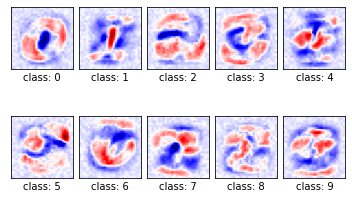

In [61]:
PlotParameters(model_s)